# Imports

In [25]:
from torch.utils.data import DataLoader, random_split
import torch
from data import ParenthesizationDataset, ParenthesizationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

# Initialization
Set the parameters here for training and initialize the train/test datasets, data loaders, model, loss function and optimizer.

In [26]:
n = 7
epochs = 50
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 32

# TODO: Create the datasets, model, loss function, optimizer, and data loader.
full_set = ParenthesizationDataset(n)
training_dataset, test_dataset = random_split(full_set, [int(train_split * len(full_set.data)), len(full_set.data) - int(train_split * len(full_set.data))])
"""training_dataset, test_dataset = ParenthesizationDataset(n), ParenthesizationDataset(n)
training_dataset.data, test_dataset.data, = [], []
for i in range(len(training_set.dataset)):
    training_dataset.data.append(training_set.dataset.__getitem__(i)[0])
for i in range(len(test_set.dataset)):
    test_dataset.data.append(test_set.dataset.__getitem__(i)[0])"""
#training_dataset = ParenthesizationDataset(n)
#test_dataset = ParenthesizationDataset(n)
model = ParenthesizationModel(n)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training the model
* Call `train_one_epoch` repeatedly to train the model once over the entire training dataset.
* Print out the epoch number and loss after each training call to verify that the loss is going down.
* Record the loss values in a list so that it can be plotted in the cell below.
* After training, call `evaluate_model` to get the confusion matrix.
* Save the model as `models/linear_model_{n}.pt`.

In [27]:
loss = []
for epoch in range(epochs):
    train_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss:.4f}")
    val_loss = evaluate_model(model, training_loader)
    loss.append([train_loss, val_loss])

confusion_matrix = evaluate_model(model, test_loader)

torch.save(model.state_dict(), f"models/linear_model_{n}.pt")



Epoch 1/50, Training Loss: 0.6308
Epoch 2/50, Training Loss: 0.5987
Epoch 3/50, Training Loss: 0.5674
Epoch 4/50, Training Loss: 0.5435
Epoch 5/50, Training Loss: 0.5242
Epoch 6/50, Training Loss: 0.5067
Epoch 7/50, Training Loss: 0.4906
Epoch 8/50, Training Loss: 0.4744
Epoch 9/50, Training Loss: 0.4625
Epoch 10/50, Training Loss: 0.4482
Epoch 11/50, Training Loss: 0.4359
Epoch 12/50, Training Loss: 0.4261
Epoch 13/50, Training Loss: 0.4171
Epoch 14/50, Training Loss: 0.4049
Epoch 15/50, Training Loss: 0.3981
Epoch 16/50, Training Loss: 0.3899
Epoch 17/50, Training Loss: 0.3842
Epoch 18/50, Training Loss: 0.3807
Epoch 19/50, Training Loss: 0.3756
Epoch 20/50, Training Loss: 0.3662
Epoch 21/50, Training Loss: 0.3610
Epoch 22/50, Training Loss: 0.3563
Epoch 23/50, Training Loss: 0.3527
Epoch 24/50, Training Loss: 0.3469
Epoch 25/50, Training Loss: 0.3460
Epoch 26/50, Training Loss: 0.3388
Epoch 27/50, Training Loss: 0.3347
Epoch 28/50, Training Loss: 0.3308
Epoch 29/50, Training Loss: 0

# Plot the loss curve
Plot the loss curve with appropriate figure title and axis labels. Save the resulting figure in `figures/loss_curve_{n}.png`.

C:\Users\lewil\AppData\Local\Temp\ipykernel_33020\1339928877.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


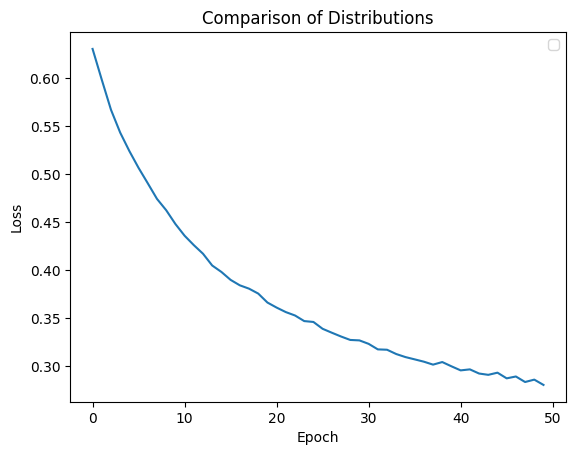

In [28]:
# plot loss vs epoch
lossvals = [loss[i][0] for i in range(epochs)]
plt.plot([i for i in range(epochs)], lossvals)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Comparison of Distributions')
plt.legend()
plt.savefig(f'figures/loss_curve_{n}.png')

# Analyze accuracy using the confusion matrix
- Print out the accuracy within each of the prediction classes.
- Print out the size of each prediction class.
- Print out the overall accuracy.

In [29]:
print("Accuracy of valid parenthesization predictions: ", confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]))
print("Accuracy of invalid parenthesization predictions: ", confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1]))
print("Predicted number of valid parenthesizations: ", confusion_matrix[0][0] + confusion_matrix[1][0])
print("Predicted number of invalid parenthesizations: ", confusion_matrix[0][1] + confusion_matrix[1][1])
print("Overall accuracy: ", (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[0][1] + confusion_matrix[1][1]))

Accuracy of valid parenthesization predictions:  1.0
Accuracy of invalid parenthesization predictions:  0.8148148148148148
Predicted number of valid parenthesizations:  64
Predicted number of invalid parenthesizations:  108
Overall accuracy:  0.8837209302325582


# Plot the model weights
Can you interpret what the model is doing? Plot the model weights using `plt.imshow()` to get a heatmap. Choose a colormap from https://matplotlib.org/stable/users/explain/colors/colormaps.html that you prefer. I default to the `bwr` colormap where negative values are blue, positive value are red, and values close to zero are white.

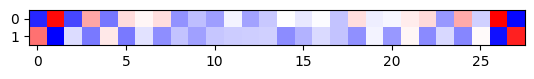

In [30]:
plt.imshow(model.fc.weight.detach().numpy(), cmap='bwr') # TODO

# "Translate" the model into code.
Implement `simple_evaluate` which condenses the model's "logic" into a single if-else statement. Run this evaluation function over the test set to produce a new confusion matrix and see how it performs compared to the model you train.

In [31]:
# Try to condense the linear model down into a single if-else statement. 
def simple_evaluate(input):
    # TODO - if closes at the start or opens at the end (use negative  indexes of -1 and -2), return invalid. else, return valid
    simple_confusion_matrix = [[0, 0], [0, 0]]
    for str in input:
        for i in range(len(str[0])):
            if str[0][i][0] == 1 and str[0][i][1] == 0 and str[0][i][-1] == 1 and str[0][i][-2] == 0:
                simple_confusion_matrix[str[1][i]][1] += 1
            else:
                simple_confusion_matrix[str[1][i]][0] += 1

    return simple_confusion_matrix

confusion_matrix = simple_evaluate(test_loader)

print("Accuracy of valid parenthesization predictions: ", confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]))
print("Accuracy of invalid parenthesization predictions: ", confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1]))
print("Predicted number of valid parenthesizations: ", confusion_matrix[0][0] + confusion_matrix[1][0])
print("Predicted number of invalid parenthesizations: ", confusion_matrix[0][1] + confusion_matrix[1][1])
print("Overall accuracy: ", (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[0][1] + confusion_matrix[1][1]))


Accuracy of valid parenthesization predictions:  1.0
Accuracy of invalid parenthesization predictions:  0.8
Predicted number of valid parenthesizations:  62
Predicted number of invalid parenthesizations:  110
Overall accuracy:  0.872093023255814
